In [57]:
import numpy as np
from moviepy import VideoClip
from PIL import ImageDraw, ImageFont

from fdray import *

font_path = Text.set_font("DejaVuSans")

In [58]:
attrs = [Finish(phong=0.5, brilliance=0.1, specular=0.2)]
objects = [
    Background(Color("gray")),
    LightSource((0.4, 90, 40), Color("white")),
    Cylinder(0, (1, 0, 0), 0.1, Color("red", 0.8), *attrs),
    Cylinder(0, (0, 1, 0), 0.1, Color("green", 0.8), *attrs),
    Cylinder(0, (0, 0, 1), 0.1, Color("blue", 0.8), *attrs),
    Text("x", 0.1, Color("red", 0.9), *attrs)
    .scale(0.4)
    .align(0, 0)
    .translate(1.1, -0.1, -0.1),
    Text("y", 0.1, Color("green", 0.9), *attrs)
    .scale(0.4)
    .align(90, 0)
    .translate(0.1, 1.1, -0.1),
    Text("z", 0.1, Color("blue", 0.9), *attrs)
    .scale(0.4)
    .align(0, 90)
    .translate(0.1, -0.1, 1.1),
]

In [59]:
def scene_location(longitude, latitude):
    img = Scene(
        Camera(longitude=longitude, latitude=latitude, view_scale=1.35),
        *objects,
    ).render(300, 300, output_alpha=False, antialias=0.001)
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(font_path, 18)
    longitude = int(longitude)
    latitude = int(latitude)
    t = f"{longitude=}, {latitude=}"
    draw.text((3, 3), t, font=font, fill=0)
    return img

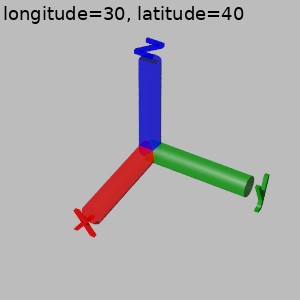

In [60]:
scene_location(30, 40)

In [61]:
duration = 10
fps = 10


def frame(t):
    image = scene_location(360 * t / (duration - 1 / fps), 30)
    return np.array(image)


video = VideoClip(frame, duration=duration)
video.write_videofile("camera-longitude.mp4", fps=fps)

MoviePy - Building video camera-longitude.mp4.
MoviePy - Writing video camera-longitude.mp4



MoviePy - Done !
MoviePy - video ready camera-longitude.mp4


In [62]:
duration = 10
fps = 10


def frame(t):
    image = scene_location(30, 360 * t / (duration - 1 / fps))
    return np.array(image)


video = VideoClip(frame, duration=duration)
video.write_videofile("camera-latitude.mp4", fps=fps)

MoviePy - Building video camera-latitude.mp4.
MoviePy - Writing video camera-latitude.mp4



MoviePy - Done !
MoviePy - video ready camera-latitude.mp4


In [63]:
def scene_view_scale(view_scale):
    img = Scene(
        Camera(35, 40, view_scale=view_scale),
        *objects,
    ).render(300, 300, output_alpha=False, antialias=0.001)
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(font_path, 18)
    t = f"{view_scale=:.2f}"
    draw.text((3, 3), t, font=font, fill=0)
    return img

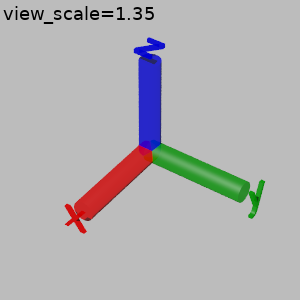

In [64]:
scene_view_scale(1.35)

In [65]:
duration = 10
fps = 10


def frame(t):
    image = scene_view_scale(2.9 * t / (duration - 1 / fps) + 0.1)
    return np.array(image)


video = VideoClip(frame, duration=duration)
video.write_videofile("camera-view-scale.mp4", fps=fps)

MoviePy - Building video camera-view-scale.mp4.
MoviePy - Writing video camera-view-scale.mp4



MoviePy - Done !
MoviePy - video ready camera-view-scale.mp4


In [66]:
def scene_distance(distance):
    img = Scene(
        Camera(35, 40, view_scale=1.35, distance=distance),
        *objects,
    ).render(300, 300, output_alpha=False, antialias=0.001)
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(font_path, 18)
    t = f"{distance=:.1f}"
    draw.text((3, 3), t, font=font, fill=0)
    return img

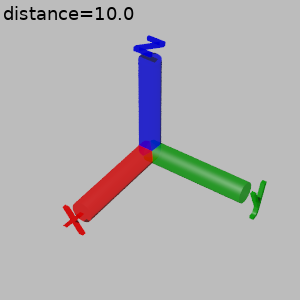

In [67]:
scene_distance(10)

In [68]:
duration = 10
fps = 10


def frame(t):
    image = scene_distance((10 - 0.5) * t / (duration - 1 / fps) + 0.5)
    return np.array(image)


video = VideoClip(frame, duration=duration)
video.write_videofile("camera-distance.mp4", fps=fps)

MoviePy - Building video camera-distance.mp4.
MoviePy - Writing video camera-distance.mp4



MoviePy - Done !
MoviePy - video ready camera-distance.mp4


In [69]:
def scene_tilt(tilt):
    img = Scene(
        Camera(35, 40, view_scale=1.35, tilt=tilt),
        *objects,
    ).render(300, 300, output_alpha=False, antialias=0.001)
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(font_path, 18)
    tilt = int(tilt)
    t = f"{tilt=}"
    draw.text((3, 3), t, font=font, fill=0)
    return img

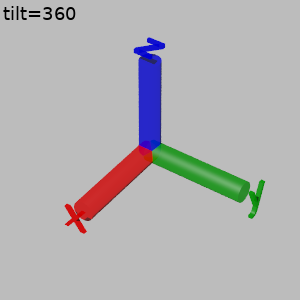

In [70]:
scene_tilt(360)

In [71]:
duration = 10
fps = 10


def frame(t):
    image = scene_tilt(360 * t / (duration - 1 / fps))
    return np.array(image)


video = VideoClip(frame, duration=duration)
video.write_videofile("camera-tilt.mp4", fps=fps)

MoviePy - Building video camera-tilt.mp4.
MoviePy - Writing video camera-tilt.mp4



MoviePy - Done !
MoviePy - video ready camera-tilt.mp4


In [72]:
def scene_look_at(look_at):
    img = Scene(
        Camera(35, 40, view_scale=1.35, look_at=(look_at, 0, 0)),
        *objects,
    ).render(300, 300, output_alpha=False, antialias=0.001)
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(font_path, 18)
    t = f"look_at=({look_at:.2f}, 0 ,0)"
    draw.text((3, 3), t, font=font, fill=0)
    return img

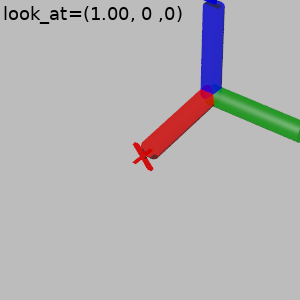

In [73]:
scene_look_at(1)

In [74]:
duration = 10
fps = 10


def frame(t):
    image = scene_look_at(2 * t / (duration - 1 / fps) - 1)
    return np.array(image)


video = VideoClip(frame, duration=duration)
video.write_videofile("camera-look-at.mp4", fps=fps)

MoviePy - Building video camera-look-at.mp4.
MoviePy - Writing video camera-look-at.mp4



MoviePy - Done !
MoviePy - video ready camera-look-at.mp4


In [148]:
def scene_orbital(forward, angle, rotation):
    camera = Camera(35, 40, view_scale=1.35)
    p1 = camera.orbital_location(forward, angle, rotation)
    img = Scene(
        camera,
        *objects,
        LightSource((forward, angle, rotation), Color("white")),
        Sphere(p1, 0.3, Color("gold", 0.5), *attrs),
    ).render(300, 300, output_alpha=False, antialias=0.001)
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(font_path, 18)
    rotation = int(rotation)
    t = f"{forward=:.2f}\n{angle=:.1f}\n{rotation=}"
    draw.text((3, 3), t, font=font, fill=0)
    return img

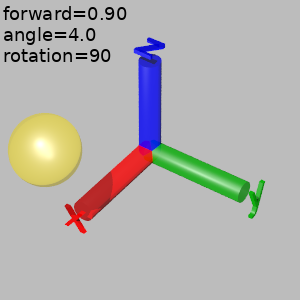

In [156]:
scene_orbital(0.9, 4, 90)

In [150]:
duration = 10
fps = 10


def frame(t):
    image = scene_orbital((1.5 - 0.1) * t / (duration - 1 / fps) + 0.1, 0, 0)
    return np.array(image)


video = VideoClip(frame, duration=duration)
video.write_videofile("camera-orbital-forward.mp4", fps=fps)

                                                                       
                                                                       
frame_index:  23%|██▎       | 23/100 [03:16<12:41,  9.88s/it, now=None]

MoviePy - Building video camera-orbital-forward.mp4.
MoviePy - Writing video camera-orbital-forward.mp4









                                                                       
                                                                       
frame_index:  23%|██▎       | 23/100 [04:35<12:41,  9.88s/it, now=None] 

MoviePy - Done !
MoviePy - video ready camera-orbital-forward.mp4


In [159]:
duration = 10
fps = 10


def frame(t):
    image = scene_orbital(1, 8 * t / (duration - 1 / fps) - 4, 0)
    return np.array(image)


video = VideoClip(frame, duration=duration)
video.write_videofile("camera-orbital-angle.mp4", fps=fps)

                                                                       
                                                                          
frame_index:  23%|██▎       | 23/100 [10:49<12:41,  9.88s/it, now=None]   

MoviePy - Building video camera-orbital-angle.mp4.
MoviePy - Writing video camera-orbital-angle.mp4














                                                                       
                                                                          
frame_index:  23%|██▎       | 23/100 [12:06<12:41,  9.88s/it, now=None]   

MoviePy - Done !
MoviePy - video ready camera-orbital-angle.mp4


In [160]:
duration = 10
fps = 10


def frame(t):
    image = scene_orbital(1, 4, 360 * t / (duration - 1 / fps))
    return np.array(image)


video = VideoClip(frame, duration=duration)
video.write_videofile("camera-orbital-rotation.mp4", fps=fps)

                                                                       
                                                                          
frame_index:  23%|██▎       | 23/100 [12:07<12:41,  9.88s/it, now=None]   

MoviePy - Building video camera-orbital-rotation.mp4.
MoviePy - Writing video camera-orbital-rotation.mp4











































                                                                       
                                                                          
frame_index:  23%|██▎       | 23/100 [13:21<12:41,  9.88s/it, now=None]   

MoviePy - Done !
MoviePy - video ready camera-orbital-rotation.mp4
